# Analyse des performances académiques des élèves
Cette analyse vise à étudier les performances scolaires des élèves et à identifier les facteurs associés aux écarts de résultats, dans une perspective d’aide à la décision éducative.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../../data/raw/StudentsPerformance.csv')
df.head()


Le jeu de données contient 1000 élèves et 8 variables décrivant des caractéristiques socio-éducatives ainsi que les résultats en mathématiques, lecture et écriture.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Les données sont complètes (aucune valeur manquante).
Les variables quantitatives correspondent aux scores académiques, tandis que les autres variables décrivent le contexte éducatif et social des élèves.

In [4]:
df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)
df[['math score', 'reading score', 'writing score', 'average_score']].head()


,math score,reading score,writing score,average_score
0,72,72,74,72.666667
1,69,90,88,82.333333
2,90,95,93,92.666667
3,47,57,44,49.333333
4,76,78,75,76.333333


Le score moyen est utilisé comme indicateur synthétique de la performance académique globale.
Il permet de résumer les résultats individuels par matière en une mesure unique et interprétable.

In [5]:
def profile(score):
    if score < 50:
        return 'À risque'
    elif score < 70:
        return 'Moyen'
    else:
        return 'Performant'

df['profile'] = df['average_score'].apply(profile)
df['profile'].value_counts()


profile
Performant    459
Moyen         438
À risque      103
Name: count, dtype: int64

Les profils académiques permettent d’identifier des groupes d’élèves selon leur niveau de performance globale, facilitant ainsi la détection des élèves à risque ou performants.

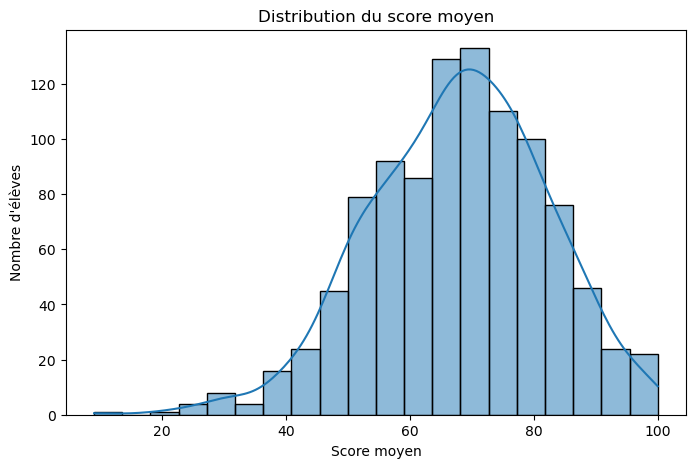

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(df['average_score'], bins=20, kde=True)
plt.title("Distribution du score moyen")
plt.xlabel("Score moyen")
plt.ylabel("Nombre d'élèves")
plt.show()


La distribution du score moyen montre une concentration autour des scores intermédiaires, avec une dispersion modérée.
Cela suggère une population hétérogène sans rupture brutale entre les niveaux de performance.


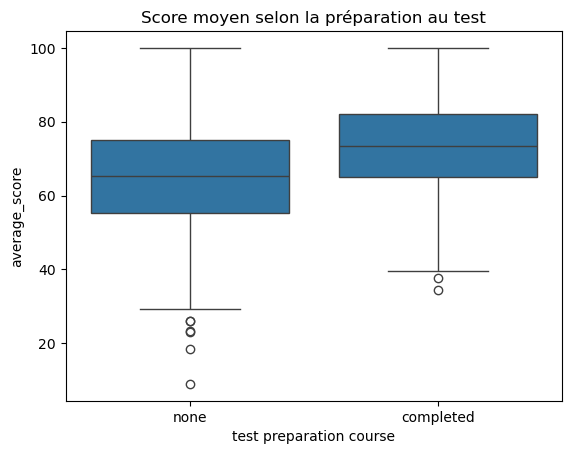

In [7]:
sns.boxplot(x='test preparation course', y='average_score', data=df)
plt.title("Score moyen selon la préparation au test")
plt.show()


Les élèves ayant suivi une préparation au test présentent en moyenne des scores plus élevés et une variabilité plus faible, suggérant un effet positif de la préparation sur la performance globale.

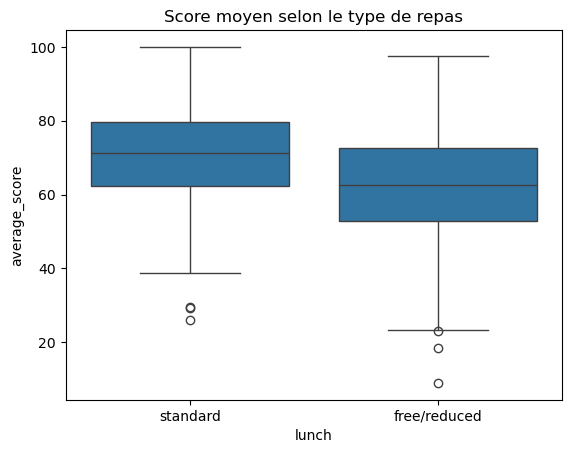

In [8]:
sns.boxplot(x='lunch', y='average_score', data=df)
plt.title("Score moyen selon le type de repas")
plt.show()


Le type de repas est associé à des écarts de performance, ce qui peut refléter indirectement des différences de contexte socio-économique entre les élèves.

In [9]:
pd.crosstab(df['profile'], df['test preparation course'], normalize='index') * 100


test preparation course,completed,none
profile,,
Moyen,27.853881,72.146119
Performant,47.494553,52.505447
À risque,17.475728,82.524272


In [10]:
pd.crosstab(df['profile'], df['test preparation course'], normalize='index') * 100



test preparation course,completed,none
profile,,
Moyen,27.853881,72.146119
Performant,47.494553,52.505447
À risque,17.475728,82.524272


Les élèves performants sont surreprésentés parmi ceux ayant suivi une préparation au test, tandis que les profils à risque sont majoritairement associés à l’absence de préparation.

 # Synthèse décisionnelle

L’analyse met en évidence que la performance académique globale des élèves est associée à plusieurs facteurs, notamment la préparation au test et le contexte socio-économique.
Le score moyen et les profils académiques constituent des indicateurs pertinents pour le suivi des performances et pourront être utilisés comme base pour une plateforme d’analyse éducative.